In [1]:
import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/combinedData.csv')
target = pd.read_csv('../data/combinedTarget.csv')

data = data.merge(target, how='left',on=['Provider','Set'])
data.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y'], inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,13,14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Warmup Question 5: From Which Providers Do the Duplicated Claims Come From?
- An easier type of frauds is to submit duplicated claims using stolen patient IDs.
- While multiple claims with identical information are not always fraudulent, the prevalence of
these duplicated records would signal potential fraud activities. 
- Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify
the duplicated claims in the inpatients_train, outpatients_train data.

In [20]:
inpat = data[any(data.Status=='in' and data.Set=='Train')]
outpat = data[data.Status=='out']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [78]:
inpat_records = inpat.groupby(['BeneID',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10']).count().reset_index()
inpat_records['BeneID'].value_counts()

BENE45156     3
BENE121796    3
BENE158540    3
BENE28270     3
BENE50641     2
             ..
BENE43491     1
BENE134571    1
BENE38653     1
BENE32194     1
BENE139121    1
Name: BeneID, Length: 4658, dtype: int64

In [29]:
outpat_records = outpat.groupby([
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8'])['BeneID'].count().reset_index()

In [30]:
outpat_records['BeneID'].value_counts()

1    28345
2       49
Name: BeneID, dtype: int64

In [23]:
inpat_records = inpat.groupby(['ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3'])['BeneID'].count().reset_index()
inpat_records['BeneID'].value_counts()

1     892
2      49
3       7
4       5
8       2
6       2
5       2
59      1
36      1
17      1
7       1
Name: BeneID, dtype: int64

In [55]:
dup_features = ['BeneID','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2','ClmDiagnosisCode_3',
                 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'Provider','PotentialFraud']
idx = outpat.duplicated(subset=dup_features,keep=False)
print(outpat.loc[idx,dup_features].shape)
outpat.loc[idx,dup_features]


(1079, 8)


,BeneID,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,Provider,PotentialFraud
572,BENE11548,NaN,NaN,NaN,NaN,NaN,PRV53269,Yes
578,BENE11548,NaN,NaN,NaN,NaN,NaN,PRV53269,Yes
3286,BENE13951,4019,NaN,NaN,NaN,NaN,PRV52560,No
3288,BENE13951,4019,NaN,NaN,NaN,NaN,PRV52560,No
3383,BENE14014,V824,NaN,NaN,NaN,NaN,PRV55971,Yes
...,...,...,...,...,...,...,...,...
690362,BENE154902,NaN,NaN,NaN,NaN,NaN,PRV53105,?
690581,BENE155192,4279,NaN,NaN,NaN,NaN,PRV56678,?
690582,BENE155192,4279,NaN,NaN,NaN,NaN,PRV56678,?
692430,BENE157674,4011,NaN,NaN,NaN,NaN,PRV55485,?


In [67]:
inpat.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Set', 'Status', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stro

In [72]:
data.melt(id_vars = ['BeneID','TotalClaim'], 
          value_vars = ['ClmProcedureCode_1', 'ClmProcedureCode_2',
                        'ClmProcedureCode_3', 'ClmProcedureCode_4', 
                        'ClmProcedureCode_5','ClmProcedureCode_6'])

,BeneID,TotalClaim,variable,value
0,BENE11001,27068.0,ClmProcedureCode_1,NaN
1,BENE11001,6068.0,ClmProcedureCode_1,7092.0
2,BENE11001,6068.0,ClmProcedureCode_1,NaN
3,BENE11011,6068.0,ClmProcedureCode_1,331.0
4,BENE11011,50.0,ClmProcedureCode_1,NaN
...,...,...,...,...
4161613,BENE159193,70.0,ClmProcedureCode_6,NaN
4161614,BENE159193,10.0,ClmProcedureCode_6,NaN
4161615,BENE159193,30.0,ClmProcedureCode_6,NaN
4161616,BENE159194,30.0,ClmProcedureCode_6,NaN


In [123]:
dup_features = ['BeneID','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3']
idx = inpat.duplicated(subset=dup_features,keep=False)
print(inpat.loc[idx,dup_features].shape)
dup_records = inpat.loc[idx,['State','Provider','PotentialFraud']]
dup_records['PotentialFraud'].value_counts()

(42, 4)


Yes    36
?       6
Name: PotentialFraud, dtype: int64

In [124]:
data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Set', 'Status', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stro

In [135]:
dup_features = ['BeneID','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3']
idx = inpat.duplicated(subset=dup_features,keep='first')
print(inpat.loc[idx,dup_features].shape)
dup_records = inpat.loc[idx,['BeneID','ClaimID','TotalClaim',
               'ClaimStartDt','Provider','PotentialFraud']]


(21, 4)


In [143]:
dup_records['ClaimID']

112       CLM82202
15858     CLM82212
31952     CLM82211
37369     CLM82209
40867     CLM82208
69847     CLM82213
74931     CLM82210
84513     CLM52916
87512     CLM82205
108312    CLM82216
111068    CLM82217
118255    CLM82206
121660    CLM82220
122195    CLM82218
135164    CLM82201
142829    CLM82214
162937    CLM82204
163788    CLM82219
175106    CLM82215
178720    CLM82203
182855    CLM82207
Name: ClaimID, dtype: object

In [166]:
outpat.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Set', 'Status', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stro

In [194]:
dup_features = ['BeneID','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2','ClmDiagnosisCode_3']
idx = data.duplicated(subset=dup_features,keep='first')
print(data.loc[idx,dup_features].shape)
dup_outrecords = data.loc[idx,['BeneID','ClaimID','Age','TotalClaim','ClaimStartDt','Provider','PotentialFraud']]
print(dup_outrecords['PotentialFraud'].value_counts())
dup_outrecords.tail(10)

(1899, 4)
No     845
?      559
Yes    495
Name: PotentialFraud, dtype: int64


,BeneID,ClaimID,Age,TotalClaim,ClaimStartDt,Provider,PotentialFraud
692458,BENE157717,CLM596435,47.0,80.0,2009-09-24,PRV54470,?
692821,BENE158216,CLM474015,83.0,300.0,2009-07-16,PRV55894,?
692829,BENE158228,CLM412444,81.0,10.0,2009-06-12,PRV53760,?
692875,BENE158264,CLM646099,70.0,50.0,2009-10-23,PRV54751,?
693147,BENE158642,CLM416102,81.0,50.0,2009-06-14,PRV53810,?
693249,BENE158773,CLM617710,70.0,800.0,2009-10-06,PRV52707,?
693317,BENE158874,CLM213758,72.0,20.0,2009-02-24,PRV55222,?
693530,BENE159124,CLM236816,66.0,60.0,2009-03-09,PRV52016,?
693533,BENE159128,CLM161175,95.0,300.0,2009-01-27,PRV53285,?
693602,BENE159197,CLM357675,79.0,2500.0,2009-05-13,PRV52983,?


In [189]:
outpat_train = pd.read_csv('../data/Train_Outpatient.csv')

In [191]:
data['DupRecord'] = data['ClaimID'].isin(dup_outrecords['ClaimID'])*dup_outrecords['TotalClaim']

In [193]:
data['DupRecord'].sum()

4290099.0

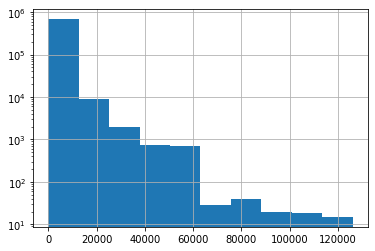

In [138]:
data['TotalClaim'].hist()
plt.yscale('log')

In [80]:
dup_features = ['BeneID','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2','ClmDiagnosisCode_3',
               'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6']
idx = outpat.duplicated(subset=dup_features,keep=False)
print(outpat.loc[idx,dup_features].shape)
dupes_outpat = outpat.loc[idx,['BeneID','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2','ClmDiagnosisCode_3',
               'ClaimStartDt','Provider','PotentialFraud']]

(3503, 7)


,BeneID,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClaimStartDt,Provider,PotentialFraud
12,BENE11017,7851,NaN,NaN,2009-02-16,PRV54761,No
17,BENE11017,7851,NaN,NaN,2009-07-02,PRV54786,Yes
572,BENE11548,NaN,NaN,NaN,2009-01-27,PRV53269,Yes
578,BENE11548,NaN,NaN,NaN,2009-11-12,PRV53269,Yes
1332,BENE12227,V788,NaN,NaN,2009-09-25,PRV55935,No
...,...,...,...,...,...,...,...
693249,BENE158773,NaN,NaN,NaN,2009-10-06,PRV52707,?
693317,BENE158874,V1046,NaN,NaN,2009-02-24,PRV55222,?
693530,BENE159124,42760,NaN,NaN,2009-03-09,PRV52016,?
693533,BENE159128,7802,NaN,NaN,2009-01-27,PRV53285,?


- Are these potentially fradulent providers duplicating their own medical records, or are they
using the records from the other providers?

In [197]:
dup_features = ['BeneID','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2','ClmDiagnosisCode_3']
idx = data.duplicated(subset=dup_features,keep=False)
print(data.loc[idx,dup_features].shape)
dupRecords = data.loc[idx,['BeneID','ClaimID','TotalClaim','ClaimStartDt','Provider','PotentialFraud']]
print(dupRecords['PotentialFraud'].value_counts())
dupRecords.tail(10)

(3712, 4)
No     1842
Yes    1110
?       760
Name: PotentialFraud, dtype: int64


,BeneID,ClaimID,TotalClaim,ClaimStartDt,Provider,PotentialFraud
692827,BENE158228,CLM359592,50.0,2009-05-14,PRV54722,?
692829,BENE158228,CLM412444,10.0,2009-06-12,PRV53760,?
692875,BENE158264,CLM646099,50.0,2009-10-23,PRV54751,?
693147,BENE158642,CLM416102,50.0,2009-06-14,PRV53810,?
693247,BENE158773,CLM320883,50.0,2009-04-23,PRV52594,?
693249,BENE158773,CLM617710,800.0,2009-10-06,PRV52707,?
693317,BENE158874,CLM213758,20.0,2009-02-24,PRV55222,?
693530,BENE159124,CLM236816,60.0,2009-03-09,PRV52016,?
693533,BENE159128,CLM161175,300.0,2009-01-27,PRV53285,?
693602,BENE159197,CLM357675,2500.0,2009-05-13,PRV52983,?


In [209]:
dupRecords.groupby(['BeneID'])['ClaimStartDt'].nunique().value_counts()

2    1628
3      78
1      44
4      31
6       1
Name: ClaimStartDt, dtype: int64

In [ ]:
dupRecords.pivot()

In [213]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [212]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [214]:
dupRecords.head()

,BeneID,ClaimID,TotalClaim,ClaimStartDt,Provider,PotentialFraud
12,BENE11017,CLM198169,10.0,2009-02-16,PRV54761,No
17,BENE11017,CLM448107,80.0,2009-07-02,PRV54786,Yes
111,BENE11093,CLM32146,21068.0,2009-01-03,PRV51842,Yes
112,BENE11093,CLM82202,21068.0,2009-01-03,PRV51842,Yes
572,BENE11548,CLM160269,100.0,2009-01-27,PRV53269,Yes


In [218]:
pd.pivot_table(dupRecords, values = 'TotalClaim', 
               index=['BeneID','ClaimID','ClaimStartDt'], columns='Provider')

Provider                           PRV51002  PRV51005  PRV51011  PRV51012  \
BeneID     ClaimID   ClaimStartDt                                           
BENE100024 CLM120521 2009-01-05         NaN       NaN       NaN       NaN   
           CLM308482 2009-04-17         NaN       NaN       NaN       NaN   
BENE100028 CLM229076 2009-03-05         NaN       NaN       NaN       NaN   
           CLM449616 2009-07-03         NaN       NaN       NaN       NaN   
BENE100146 CLM168180 2009-01-31         NaN       NaN       NaN       NaN   
...                                     ...       ...       ...       ...   
BENE99764  CLM397391 2009-06-04         NaN       NaN       NaN       NaN   
BENE99937  CLM146938 2009-01-19         NaN       NaN       NaN       NaN   
           CLM346452 2009-05-07         NaN       NaN       NaN       NaN   
BENE99999  CLM163521 2009-01-28         NaN       NaN       NaN       NaN   
           CLM475422 2009-07-17         NaN       NaN       NaN       NaN   

Provider                           PRV51017  PRV51021  PRV51022  PRV51023  \
BeneID     ClaimID   ClaimStartDt                                           
BENE100024 CLM120521 2009-01-05         NaN       NaN       NaN       NaN   
           CLM308482 2009-04-17         NaN       NaN       NaN       NaN   
BENE100028 CLM229076 2009-03-05         NaN       NaN       NaN       NaN   
           CLM449616 2009-07-03         NaN       NaN       NaN       NaN   
BENE100146 CLM168180 2009-01-31         NaN       NaN       NaN       NaN   
...                                     ...       ...       ...       ...   
BENE99764  CLM397391 2009-06-04         NaN       NaN       NaN       NaN   
BENE99937  CLM146938 2009-01-19         NaN       NaN       NaN       NaN   
           CLM346452 2009-05-07         NaN       NaN       NaN       NaN   
BENE99999  CLM163521 2009-01-28         NaN       NaN       NaN       NaN   
           CLM475422 2009-07-17         NaN       NaN       NaN       NaN   

Provider                           PRV51031  PRV51037  ...  PRV57677  \
BeneID     ClaimID   ClaimStartDt                      ...             
BENE100024 CLM120521 2009-01-05         NaN       NaN  ...       NaN   
           CLM308482 2009-04-17         NaN       NaN  ...       NaN   
BENE100028 CLM229076 2009-03-05         NaN       NaN  ...       NaN   
           CLM449616 2009-07-03         NaN       NaN  ...       NaN   
BENE100146 CLM168180 2009-01-31         NaN       NaN  ...       NaN   
...                                     ...       ...  ...       ...   
BENE99764  CLM397391 2009-06-04         NaN       NaN  ...       NaN   
BENE99937  CLM146938 2009-01-19         NaN       NaN  ...       NaN   
           CLM346452 2009-05-07         NaN       NaN  ...       NaN   
BENE99999  CLM163521 2009-01-28         NaN       NaN  ...       NaN   
           CLM475422 2009-07-17         NaN       NaN  ...       NaN   

Provider                           PRV57680  PRV57691  PRV57693  PRV57706  \
BeneID     ClaimID   ClaimStartDt                                           
BENE100024 CLM120521 2009-01-05         NaN       NaN       NaN       NaN   
           CLM308482 2009-04-17         NaN       NaN       NaN       NaN   
BENE100028 CLM229076 2009-03-05         NaN       NaN       NaN       NaN   
           CLM449616 2009-07-03         NaN       NaN       NaN       NaN   
BENE100146 CLM168180 2009-01-31         NaN       NaN       NaN       NaN   
...                                     ...       ...       ...       ...   
BENE99764  CLM397391 2009-06-04         NaN       NaN       NaN       NaN   
BENE99937  CLM146938 2009-01-19         NaN       NaN       NaN       NaN   
           CLM346452 2009-05-07         NaN       NaN       NaN       NaN   
BENE99999  CLM163521 2009-01-28         NaN       NaN       NaN       NaN   
           CLM475422 2009-07-17         NaN       NaN       NaN       NaN   

Provider                           PRV57709  PRV57715  PR

In [ ]:
dupRecords.groupby(['Provider','BeneID'])

In [210]:
def timeDiff(date):
    max(date)-min(date)
dupRecords.groupby(['BeneID'])

12       2009-02-16
17       2009-07-02
111      2009-01-03
112      2009-01-03
572      2009-01-27
            ...    
693249   2009-10-06
693317   2009-02-24
693530   2009-03-09
693533   2009-01-27
693602   2009-05-13
Name: ClaimStartDt, Length: 3712, dtype: datetime64[ns]

In [200]:
data[data.BeneID=='BENE100028']

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,TotalClaim,DailyCharge,InscCovPercent,PotentialFraud,DupRecord
420953,BENE100028,CLM124187,2009-01-07,2009-01-07,PRV53797,300,PHY313278,NaN,NaN,NaN,...,0,1,NaN,1,66.0,300.0,300.0,1.0,Yes,NaN
420954,BENE100028,CLM229076,2009-03-05,2009-03-05,PRV52032,100,PHY368107,NaN,NaN,NaN,...,0,1,NaN,1,67.0,100.0,100.0,1.0,Yes,100.0
420955,BENE100028,CLM256733,2009-03-20,2009-03-20,PRV53634,1000,PHY430880,NaN,NaN,NaN,...,0,2,NaN,1,67.0,1000.0,1000.0,1.0,No,NaN
420956,BENE100028,CLM449616,2009-07-03,2009-07-03,PRV53774,30,PHY383855,NaN,NaN,NaN,...,0,1,NaN,1,67.0,30.0,30.0,1.0,No,30.0


It seems like they're duplicating their own records

- Assuming that the claimStartDates are authentic, identify the providers which are the information
receivers. Identify the providers which are the information givers.

In [60]:
data['ClaimStartDt'] = pd.to_datetime(data['ClaimStartDt'])

- Summarize the duplicate record counts/provider and study if the statistics have different
distributions between honest and potentialfraud providers.

In [92]:
outpat.sample(10).iloc[:,55:]

,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,TotalClaim,DailyCharge,InscCovPercent,PotentialFraud
194350,10,0,1,0,2,NaN,1,60.0,70.0,70.0,1.000000,No
157273,60,0,4,0,3,NaN,1,77.0,150.0,150.0,0.666667,No
202163,70,0,2,0,2,NaN,1,76.0,50.0,50.0,1.000000,No
510215,150,0,5,0,2,NaN,1,82.0,50.0,50.0,1.000000,No
282376,30,0,1,0,1,NaN,1,95.0,20.0,20.0,1.000000,No
319062,1370,0,5,0,2,NaN,1,56.0,700.0,700.0,1.000000,Yes
176998,30,0,5,0,2,NaN,1,84.0,400.0,400.0,1.000000,?
441015,360,0,1,0,1,NaN,1,66.0,130.0,130.0,0.230769,No
330475,1690,0,4,0,4,NaN,1,70.0,200.0,200.0,1.000000,No
468464,990,0,6,0,3,NaN,1,92.0,0.0,0.0,NaN,No


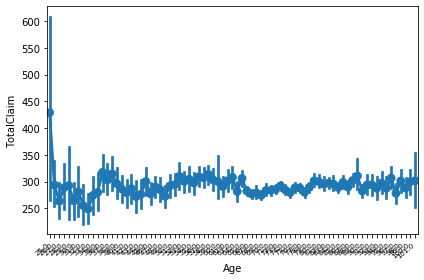

In [95]:
ax= sns.pointplot(x='Age',y='TotalClaim',data=outpat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.tight_layout()

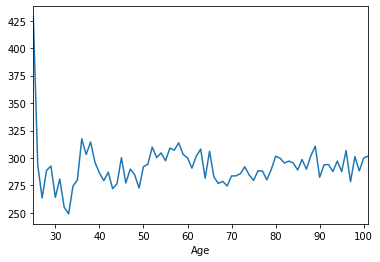

In [99]:
outpat.groupby(['Age'])['TotalClaim'].mean().plot()

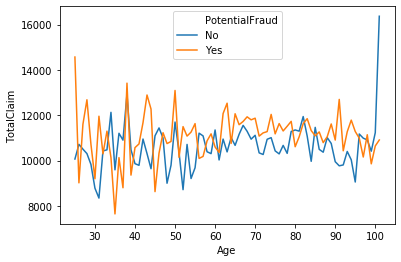

In [102]:
df = inpat[inpat.PotentialFraud !='?'].groupby(['Age','PotentialFraud'])['TotalClaim'].mean().reset_index()
sns.lineplot(x = 'Age', y = 'TotalClaim',hue='PotentialFraud', data = df)

- Do these potentially fraud providers reuse doctor IDs and/or patient IDs?  If so, these 
fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to
the other types of fraudulent activities.

- Do these duplicated records show any anomaly in terms of geographic locations?
Even though the original data doesn't specify the providers nor the doctors' practice locations,
one may use the majority of the patients' residence state/county information to infer their
physical locations.

In [104]:
dup_features = ['BeneID','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2','ClmDiagnosisCode_3']
idx = inpat.duplicated(subset=dup_features,keep=False)
print(inpat.loc[idx,dup_features].shape)
dup_records = inpat.loc[idx,['BeneID','State','County','Provider','PotentialFraud']]
dup_records

(42, 4)


,BeneID,State,County,Provider,PotentialFraud
111,BENE11093,Colorado,500,PRV51842,Yes
112,BENE11093,Colorado,500,PRV51842,Yes
15856,BENE24807,Minnesota,610,PRV54111,Yes
15858,BENE24807,Minnesota,610,PRV54111,Yes
31951,BENE39346,Minnesota,200,PRV54065,Yes
31952,BENE39346,Minnesota,200,PRV54065,Yes
37368,BENE44545,Kentucky,530,PRV52843,Yes
37369,BENE44545,Kentucky,530,PRV52843,Yes
40865,BENE47786,Indiana,290,PRV52828,Yes
40867,BENE47786,Indiana,290,PRV52828,Yes


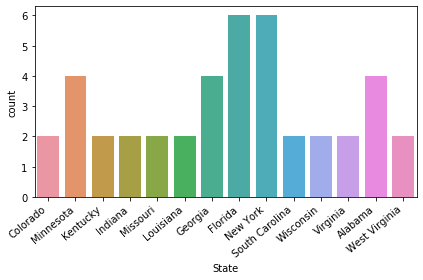

In [108]:
ax = sns.countplot(x = 'State', data = dup_records)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.tight_layout()

- Base on your best knowledge of suspicious activities in duplicating the patient claims, flag
the providers accordingly. Compare with the **PotentialFraud** flags offered by the dataset and discuss.

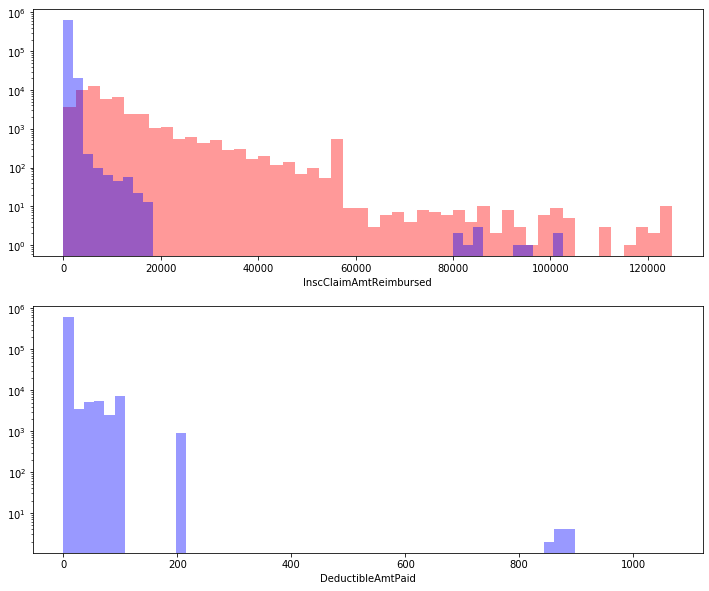

In [25]:
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.distplot(a= data[data.Status=='in']['InscClaimAmtReimbursed'], kde=False, color = 'red')
sns.distplot(a= data[data.Status=='out']['InscClaimAmtReimbursed'], kde=False, color = 'blue')
plt.yscale('log')

plt.subplot(212)
sns.distplot(a= data[data.Status=='in']['DeductibleAmtPaid'], kde=False, color = 'red')
sns.distplot(a= data[data.Status=='out']['DeductibleAmtPaid'], kde=False, color = 'blue')
plt.yscale('log')

- Study the distributions of 
insurance covered percentages **InscClaimAmtReimbursed/(InscClaimAmtReimbursed+DeductibleAmtPaid)**.

In [32]:
data['InscCovPerc'] = data['InscClaimAmtReimbursed']/(data['InscClaimAmtReimbursed']+data['DeductibleAmtPaid'])

In [46]:
x = data.copy()
x.fillna(0, inplace=True)

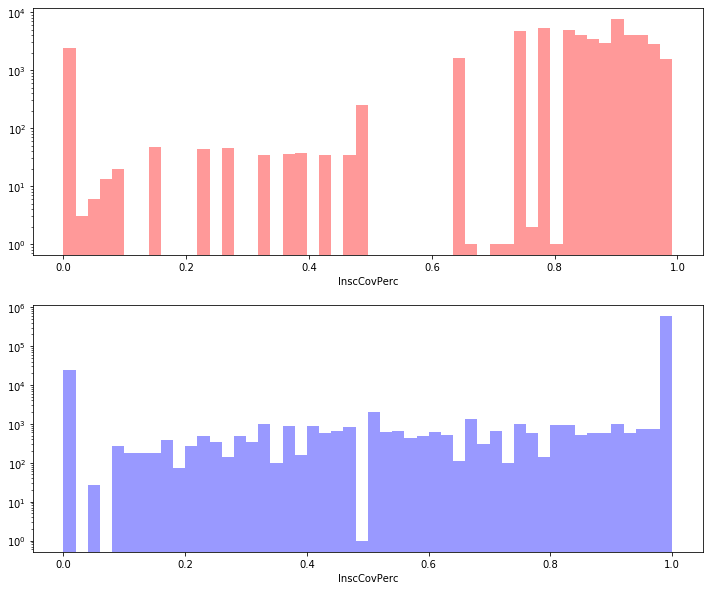

In [49]:
plt.figure(figsize=(12,10))


plt.subplot(211)
sns.distplot(a= x[x.Status=='in']['InscCovPerc'], kde=False, color = 'red')
plt.yscale('log')

plt.subplot(212)
sns.distplot(a= x[x.Status=='out']['InscCovPerc'], kde=False, color = 'blue')
plt.yscale('log')



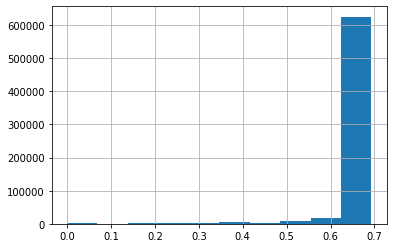

In [53]:
np.log(data['InscCovPerc']+1).hist()

- Study the distributions of the durations of average insurance claims (end-start) of the providers? 
Box-plot/violin-plot based on the **PotentialFraud** flag. Do you find any differences for none-potential fraud vs potential-fraud
providers?

In [67]:
df = data.groupby(['Provider','PotentialFraud','Status'])['ClaimDays'].mean().reset_index()

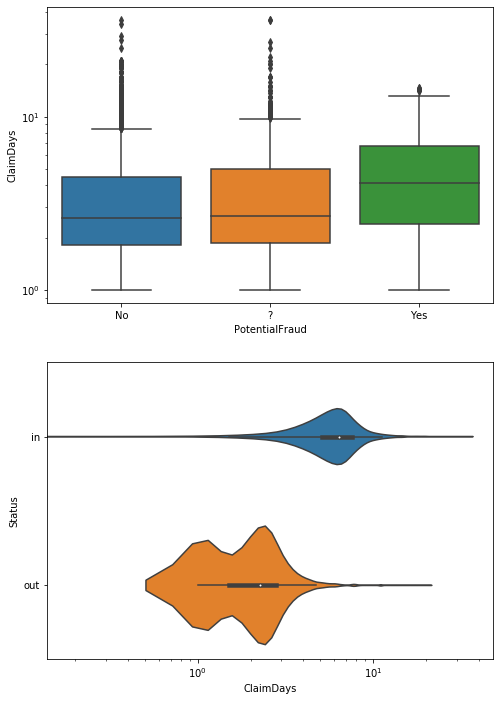

In [68]:
plt.figure(figsize=(8,12))


plt.subplot(211)
sns.boxplot(x = 'PotentialFraud', y = 'ClaimDays', data=df)
plt.yscale('log')

plt.subplot(212)

sns.violinplot(y = 'Status', x = 'ClaimDays', data=df)
plt.xscale('log')

- How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed+DeductibleAmtPaid?

In [69]:
data['TotalClaim'] = data['InscClaimAmtReimbursed'] + data['DeductibleAmtPaid']

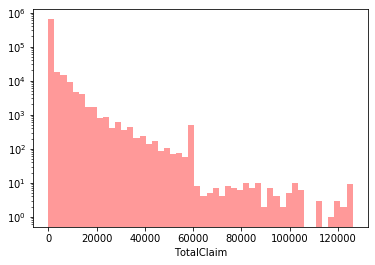

In [73]:
sns.distplot(a= data['TotalClaim'].fillna(0), kde=False, color = 'red')
plt.yscale('log')


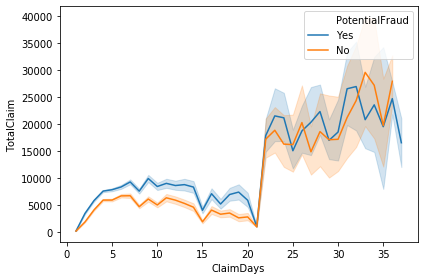

In [85]:
sns.lineplot(x = 'ClaimDays', y = 'TotalClaim', hue = 'PotentialFraud', data = data[data.PotentialFraud != '?'])
plt.tight_layout()


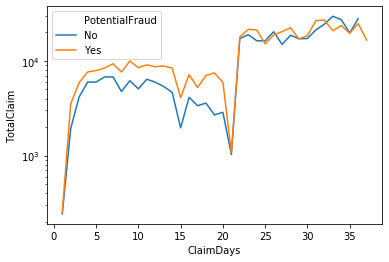

In [92]:
df = data[data.PotentialFraud != '?'].groupby(['ClaimDays','PotentialFraud'])['TotalClaim'].mean().reset_index()
sns.lineplot(x = 'ClaimDays', y = 'TotalClaim', hue = 'PotentialFraud', data = df)
plt.yscale('log')

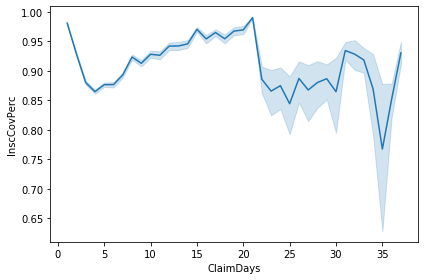

In [98]:
sns.lineplot(x = 'ClaimDays', y = 'InscCovPerc', data = data[data.PotentialFraud != '?'])
plt.tight_layout()

- Consider mean daily total charges (i.e. total charge/duration), please describe their distribution.
How do the **Potential Fraud** flag affect the distribution patterns?

In [112]:
from apyori import apriori

In [113]:
transactions = [
    ['beer', 'nuts'],
    ['beer', 'cheese'],
]
results = list(apriori(transactions))

In [114]:
results

[RelationRecord(items=frozenset({'beer'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beer'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'cheese'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'cheese'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'nuts'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nuts'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'beer', 'cheese'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beer', 'cheese'}), confidence=0.5, lift=1.0), OrderedStatistic(items_base=frozenset({'beer'}), items_add=frozenset({'cheese'}), confidence=0.5, lift=1.0), OrderedStatistic(items_base=frozenset({'cheese'}), items_add=frozenset({'beer'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'beer', 'nuts'}),